In [1]:
import utils
from tensorflow import keras
from tensorflow.keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import config
import model

Num_sensor = 128
Num_gesture = 8
Num_labels = 8
subject = 1

hidden_units = [128, 128]
learning_rate = 0.002
dropout_rate = 0.15
num_epochs = 50
batch_size = 128

num_classes = 8
D_Type = 'B'
path = 'C:/Users/hml76/Desktop/Jupyter/Paper1__renew/CapgMyo/Data/DB_{}_preproceesed/'.format(D_Type)
lr_scheduler = LearningRateScheduler(model.step_decay, verbose=1)

# Capgmyo A - KNN1 (subject 1)

Train data shape: (8205, 1001)
Test data shape: (2035, 1001)


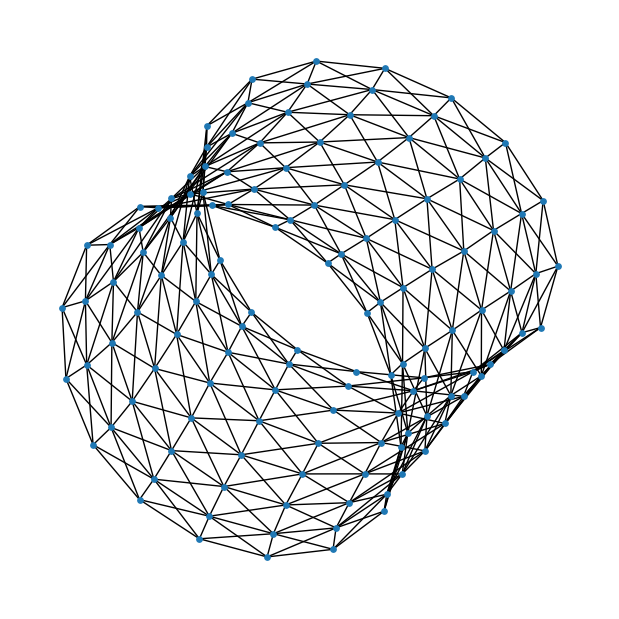

In [2]:
data_processor = utils.data_processing(Num_sensor, subject, Num_labels, Num_gesture)
EMG_dataframe = data_processor.build_data(path, D_Type='B')
Node_feature, X_train, y_train, X_test, y_test = data_processor.data_split(EMG_dataframe, ratio=0.2) #test ratio
graph_generator = config.Graph_CapgMyo(EMG_dataframe, Num_sensor)
graph, edges, edge_weights = graph_generator.KNN1()
graph_generator.draw_graph(graph[:900])

In [3]:
graph, edges, edge_weights = graph_generator.KNN1()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/50
65/65 [==============================] - 13s 75ms/step - loss: 1.8841 - acc: 0.3018 - val_loss: 2.1110 - val_acc: 0.1538
Epoch 2/50
65/65 [==============================] - 4s 63ms/step - loss: 1.0373 - acc: 0.6433 - val_loss: 2.5491 - val_acc: 0.1400
Epoch 3/50
65/65 [==============================] - 4s 63ms/step - loss: 0.3301 - acc: 0.8946 - val_loss: 3.0251 - val_acc: 0.2526
Epoch 4/50
65/65 [==============================] - 4s 64ms/step - loss: 0.1228 - acc: 0.9609 - val_loss: 2.5854 - val_acc: 0.4467
Epoch 5/50
65/65 [==============================] - 4s 66ms/step - loss: 0.0766 - acc: 0.9770 - val_loss: 2.5214 - val_acc: 0.3867
Epoch 6/50
65/65 [==============================] - 4s 59ms/step - loss: 0.0339 - acc: 0.9892 - val_loss: 2.3637 - val_acc: 0.5111
Epoch 7/50
65/65 [==============================] - 4s 58ms/step - loss: 0.0154 - acc: 0.9950 - val_loss: 1.9103 - val_acc: 0.5813
Epoch 8/50
65/65 [==============================] - 4s 58ms/step - loss: 0.0459 - 

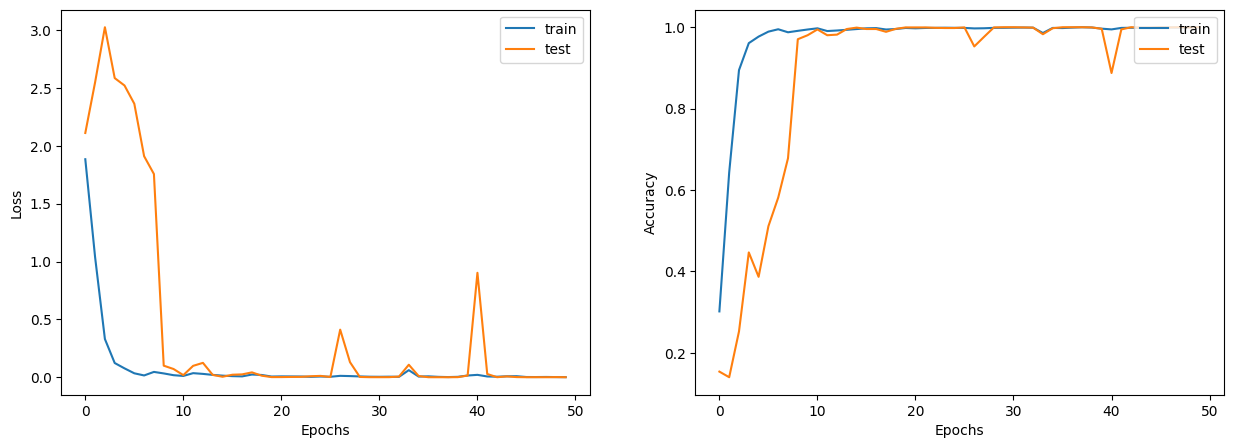

In [4]:
utils.display_learning_curves(history)

# Capgmyo A - KNN1+SW (subject 1)

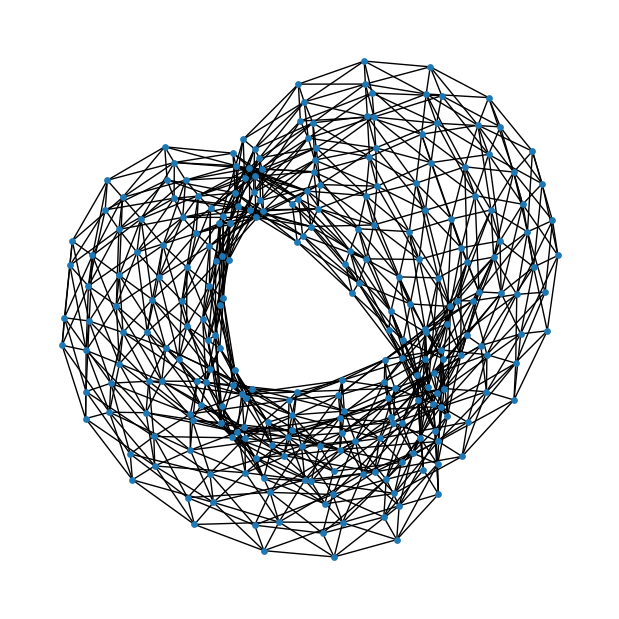

In [5]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_generator.draw_graph(graph[:1980])
#graph_generator.draw_graph(graph[:6200])

In [6]:
graph, edges, edge_weights = graph_generator.KNN1_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN1_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/50
65/65 [==============================] - 11s 75ms/step - loss: 1.9204 - acc: 0.2818 - val_loss: 2.0980 - val_acc: 0.1430
Epoch 2/50
65/65 [==============================] - 4s 62ms/step - loss: 1.0826 - acc: 0.6361 - val_loss: 2.0739 - val_acc: 0.2305
Epoch 3/50
65/65 [==============================] - 4s 64ms/step - loss: 0.3181 - acc: 0.8981 - val_loss: 3.6147 - val_acc: 0.1857
Epoch 4/50
65/65 [==============================] - 4s 63ms/step - loss: 0.0794 - acc: 0.9756 - val_loss: 4.6865 - val_acc: 0.1661
Epoch 5/50
65/65 [==============================] - 4s 68ms/step - loss: 0.0317 - acc: 0.9899 - val_loss: 5.6126 - val_acc: 0.2590
Epoch 6/50
65/65 [==============================] - 4s 65ms/step - loss: 0.0245 - acc: 0.9920 - val_loss: 2.8351 - val_acc: 0.3980
Epoch 7/50
65/65 [==============================] - 4s 65ms/step - loss: 0.0360 - acc: 0.9892 - val_loss: 2.7998 - val_acc: 0.4968
Epoch 8/50
65/65 [==============================] - 4s 64ms/step - loss: 0.0267 - 

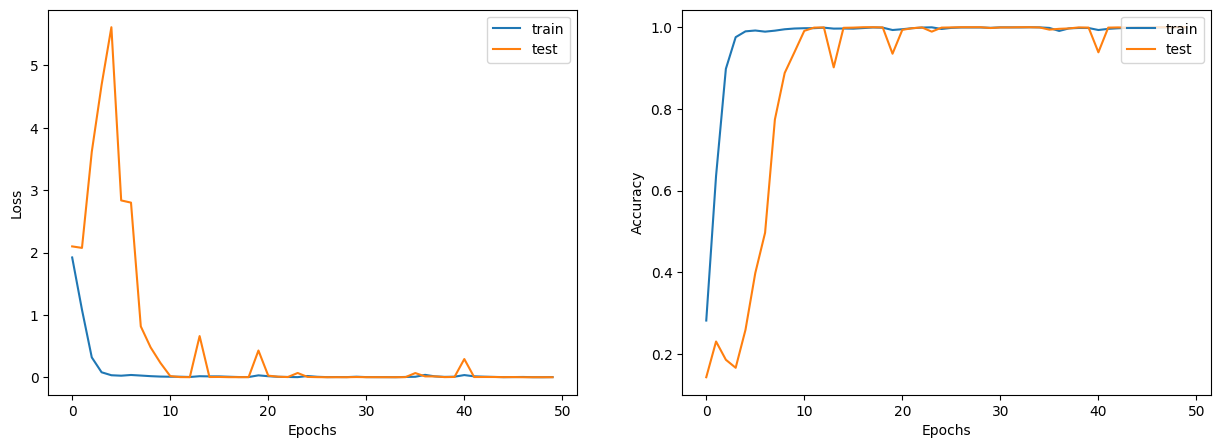

In [7]:
utils.display_learning_curves(history)

# Capgmyo A - KNN2 (subject 1)

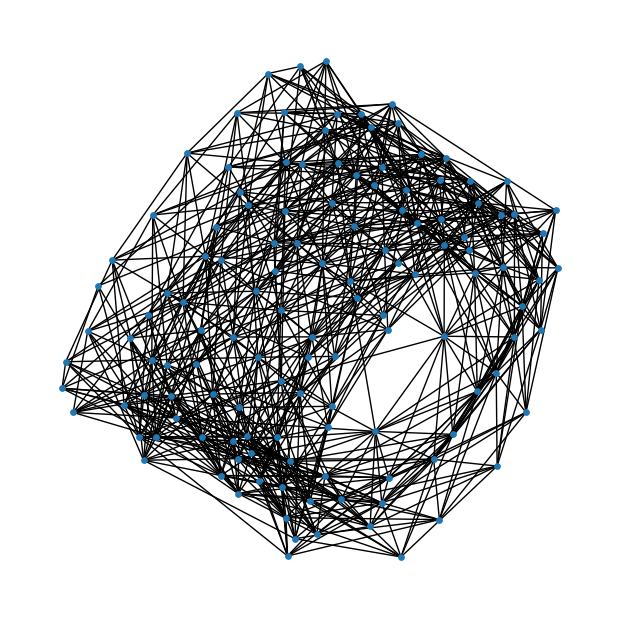

In [8]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_generator.draw_graph(graph[:1500])

In [9]:
graph, edges, edge_weights = graph_generator.KNN2()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN2_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/50
65/65 [==============================] - 13s 96ms/step - loss: 1.8862 - acc: 0.3041 - val_loss: 2.0503 - val_acc: 0.1440
Epoch 2/50
65/65 [==============================] - 5s 81ms/step - loss: 0.9910 - acc: 0.6641 - val_loss: 2.1125 - val_acc: 0.2044
Epoch 3/50
65/65 [==============================] - 5s 82ms/step - loss: 0.2886 - acc: 0.9081 - val_loss: 3.5898 - val_acc: 0.1754
Epoch 4/50
65/65 [==============================] - 5s 84ms/step - loss: 0.0913 - acc: 0.9700 - val_loss: 3.7391 - val_acc: 0.2875
Epoch 5/50
65/65 [==============================] - 5s 83ms/step - loss: 0.0490 - acc: 0.9846 - val_loss: 4.1687 - val_acc: 0.2948
Epoch 6/50
65/65 [==============================] - 5s 85ms/step - loss: 0.0709 - acc: 0.9789 - val_loss: 2.7569 - val_acc: 0.4300
Epoch 7/50
65/65 [==============================] - 5s 82ms/step - loss: 0.0357 - acc: 0.9885 - val_loss: 2.4410 - val_acc: 0.5130
Epoch 8/50
65/65 [==============================] - 5s 81ms/step - loss: 0.0175 - 

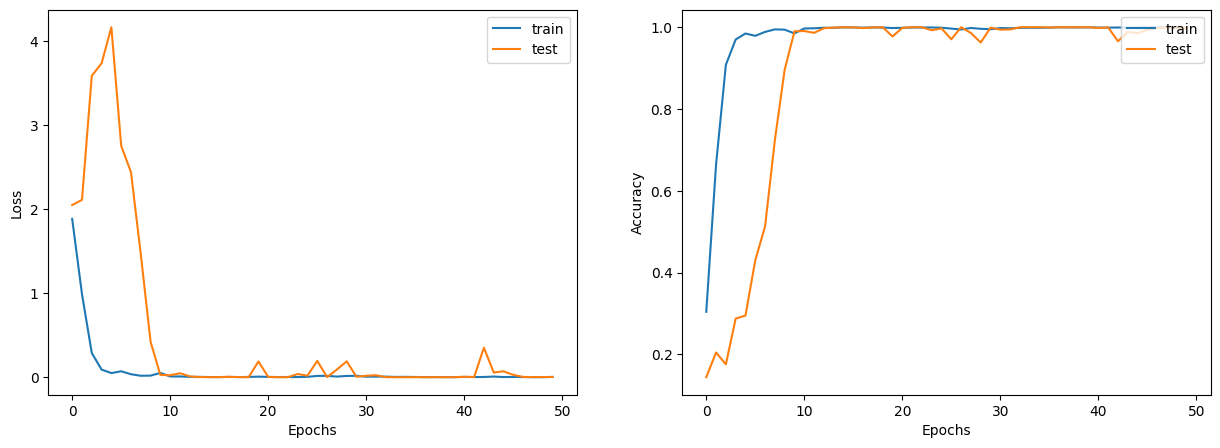

In [10]:
utils.display_learning_curves(history)

# Capgmyo A - KNN2+SW (subject 1)

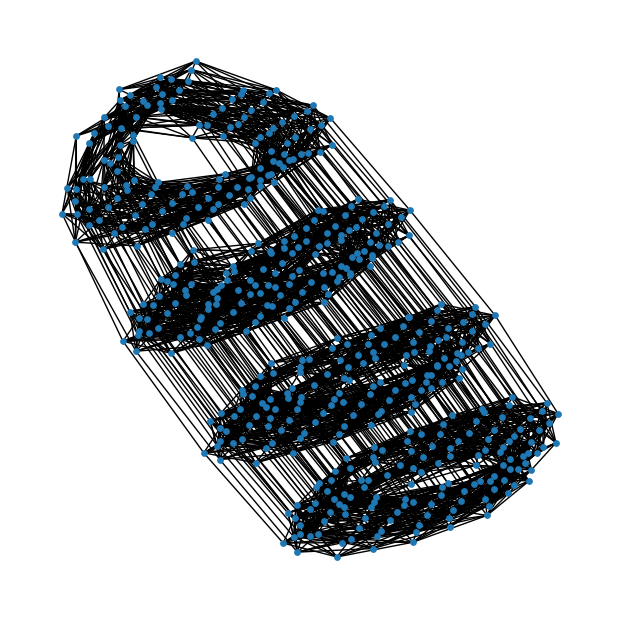

In [11]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_generator.draw_graph(graph[:6500])

In [12]:
graph, edges, edge_weights = graph_generator.KNN2_SW()
graph_metadata = (Node_feature, edges, edge_weights) 

GCN = model.GNNNodeClassifier(
    graph_info=graph_metadata,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="KNN2_SW_GCN_recognition_model",
)

GCN.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

history = GCN.fit(
    x=X_train,
    y=y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    #callbacks=[lr_scheduler],
)

Epoch 1/50
65/65 [==============================] - 14s 101ms/step - loss: 1.9196 - acc: 0.2868 - val_loss: 2.0616 - val_acc: 0.1440
Epoch 2/50
65/65 [==============================] - 5s 84ms/step - loss: 1.0249 - acc: 0.6492 - val_loss: 2.3308 - val_acc: 0.1803
Epoch 3/50
65/65 [==============================] - 6s 85ms/step - loss: 0.3019 - acc: 0.8982 - val_loss: 5.7926 - val_acc: 0.1366
Epoch 4/50
65/65 [==============================] - 6s 89ms/step - loss: 0.0836 - acc: 0.9749 - val_loss: 5.3338 - val_acc: 0.1720
Epoch 5/50
65/65 [==============================] - 6s 91ms/step - loss: 0.0369 - acc: 0.9873 - val_loss: 6.8975 - val_acc: 0.1740
Epoch 6/50
65/65 [==============================] - 6s 88ms/step - loss: 0.0303 - acc: 0.9900 - val_loss: 5.0699 - val_acc: 0.2609
Epoch 7/50
65/65 [==============================] - 6s 87ms/step - loss: 0.0271 - acc: 0.9920 - val_loss: 1.0749 - val_acc: 0.7199
Epoch 8/50
65/65 [==============================] - 6s 87ms/step - loss: 0.0136 -

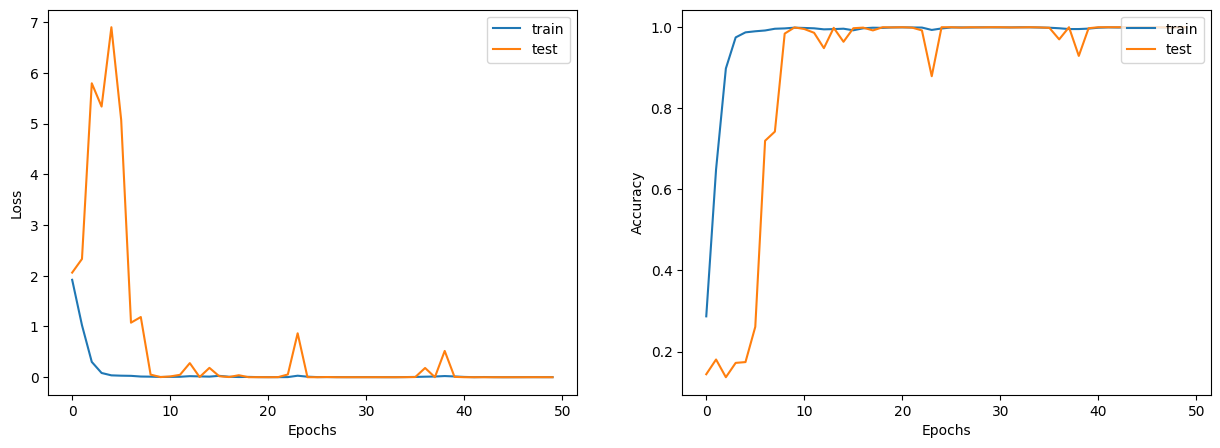

In [13]:
utils.display_learning_curves(history)